<a href="https://colab.research.google.com/github/IK2023-info/ik2023-lab07-08-napsugarinf/blob/main/Copy_of_Oszt%C3%A1lyoz%C3%A1s.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Osztályozás

Mikor a prediktív modellezés célváltozója diszkrét, a feladatot [osztályozásnak](https://en.wikipedia.org/wiki/Statistical_classification) hívjuk. Annak az előrejelzése például, hogy egy banki ügyfél felveheti-e vagy sem a kért hitelt, egy osztályozási feladat mivel a célváltozó bináris értékű (pozitív elbírálás, elutasítás).

## Példa

Tekintsük azt a feladatot, amelyben virágok fajtáját ( nőszirom (Setosa), foltos nőszirom (Versicolor), vagy virginiai nőszirom (Virginica)) szeretnénk előrejelezni [tulajdonságaik alapján](https://en.wikipedia.org/wiki/Iris_flower_data_set) (virágszirom, csészelevél méretek).

![](https://upload.wikimedia.org/wikipedia/commons/5/56/Iris_dataset_scatterplot.svg) 

Ábra 1. Az [Írisz adatállomány](https://archive.ics.uci.edu/ml/datasets/iris) 150 virágának ábrázolása a karakterisztikáik szerint.[Forrás](https://upload.wikimedia.org/wikipedia/commons/5/56/Iris_dataset_scatterplot.svg).

### Osztályozás - scikit learn

[Forrás 1](https://towardsdatascience.com/exploring-classifiers-with-python-scikit-learn-iris-dataset-2bcb490d2e1b), [forrás 2](https://github.com/girishp92/Classification-of-Iris-Data-using-Machine-learning-methods-in-Python).

In [3]:
import sys
import scipy
import numpy
import matplotlib
import pandas
import sklearn

import seaborn as sns
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


#load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length','sepal-width','petal-length','petal-width','class']
dataset = pandas.read_csv(url, names=names)

In [4]:
print(dataset.shape)

(150, 5)


In [5]:
print(dataset.head(20))

    sepal-length  sepal-width  petal-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3    

In [6]:
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [7]:
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


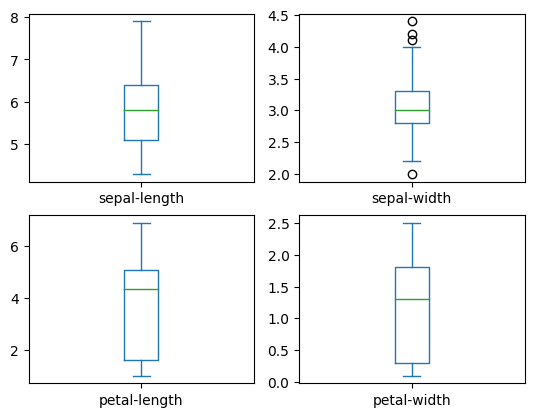

In [8]:
#box and wisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

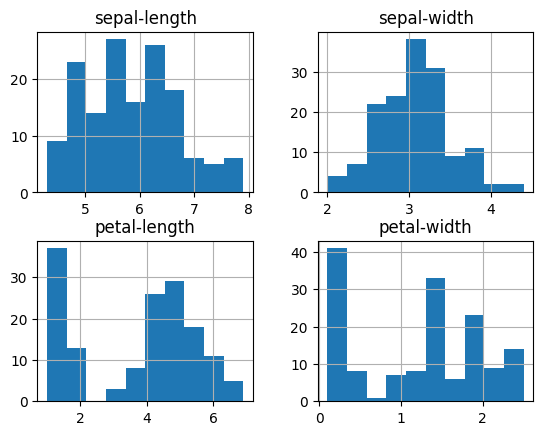

In [9]:
# histograms
dataset.hist()
plt.show()

In [10]:
#split-out validation dataset
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

LR: 0.983333 (0.033333)


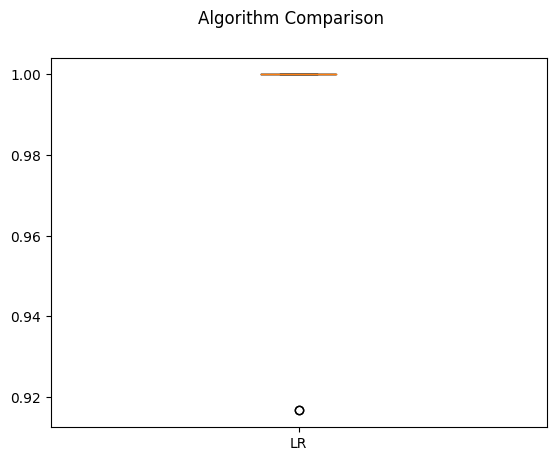

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        30
      macro avg       0.92      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30

LDA: 0.975000 (0.038188)


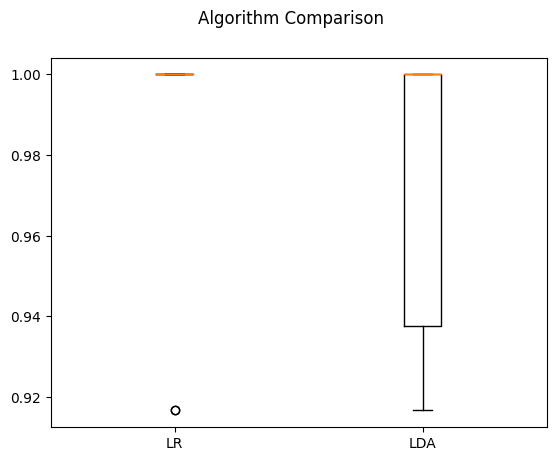

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        30
      macro avg       0.92      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30

KNN: 0.983333 (0.033333)


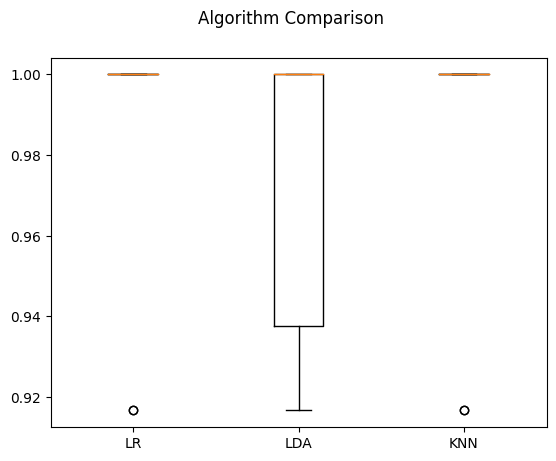

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        30
      macro avg       0.92      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30

CART: 0.950000 (0.076376)


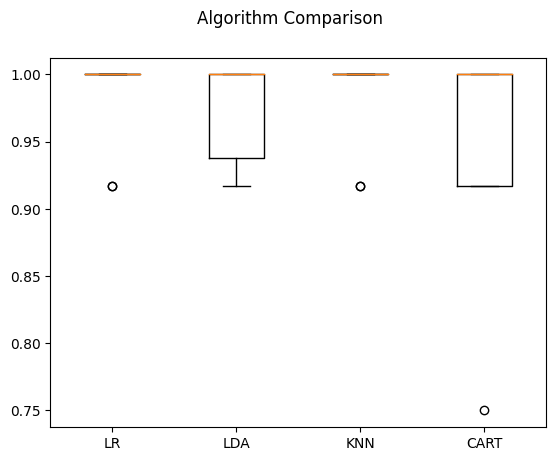

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        30
      macro avg       0.92      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30

NB: 0.966667 (0.040825)


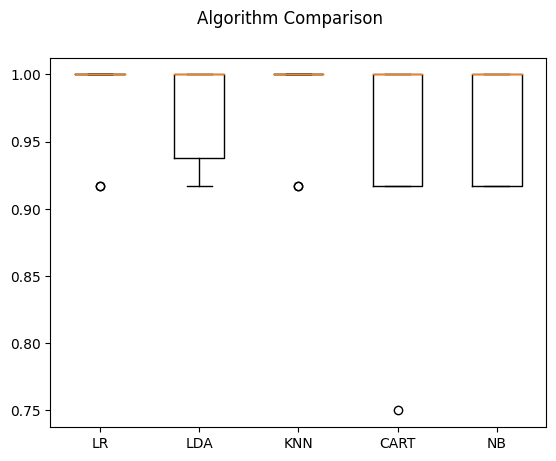

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        30
      macro avg       0.92      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30

SVM: 0.983333 (0.033333)


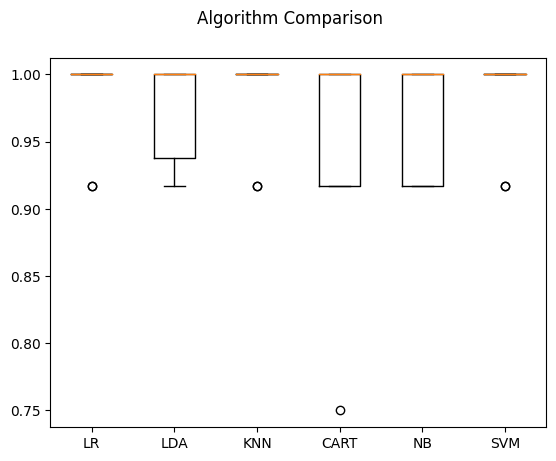

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        30
      macro avg       0.92      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30



In [12]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

#spot check algorithms

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier() ))
models.append(('CART', DecisionTreeClassifier() ))
models.append(('NB',GaussianNB() ))
models.append(('SVM', SVC() ))

#evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    #print(cv_results)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

#compare algorithms
    fig = plt.figure()
    fig.suptitle('Algorithm Comparison')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names) 
    plt.show()

#make predicitions on validation dataset

    knn = KNeighborsClassifier()
    knn.fit(X_train, Y_train)
    predictions = knn.predict(X_validation)
    print(accuracy_score(Y_validation, predictions))
    print(confusion_matrix(Y_validation, predictions))
    print(classification_report(Y_validation, predictions))

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
import sys
import scipy
import numpy
import matplotlib
import pandas
import sklearn

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [47]:
#load dataset
path='/content/drive/My Drive/dbalance.csv'

data=pd.read_csv(path, header=None)
print(data.shape)
data.head(5)

(628, 5)


,0,1,2,3,4
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


In [48]:
print(data.describe())

          0    1    2    3    4
count   628  628  628  628  627
unique    8   11   10   12    7
top       R    1    3    1    1
freq    286  125  125  125  125


In [49]:
data.columns = ['ClassName', 'LeftWeight', 'LeftDistance', 'RightWeight', 'RightDistance']
data.head(5)

,ClassName,LeftWeight,LeftDistance,RightWeight,RightDistance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


In [50]:
print(data.isnull().sum())
data = data.dropna()
print(data.shape)

ClassName        0
LeftWeight       0
LeftDistance     0
RightWeight      0
RightDistance    1
dtype: int64
(627, 5)


In [51]:
print(data.duplicated().sum())

0


In [52]:
print(data.describe())

       ClassName LeftWeight LeftDistance RightWeight RightDistance
count        627        627          627         627           627
unique         7         10            9          11             7
top            R          1            3           1             1
freq         286        125          125         125           125


In [53]:
data['LeftWeight'] = pd.to_numeric(data['LeftWeight'], errors='coerce')
data['LeftDistance'] = pd.to_numeric(data['LeftDistance'], errors='coerce')
data['RightWeight'] = pd.to_numeric(data['RightWeight'], errors='coerce')
data['RightDistance'] = pd.to_numeric(data['RightDistance'], errors='coerce')
data = data.dropna()


In [54]:
data['ClassName'] = data['ClassName'].astype(str)
data['LeftWeight'] = data['LeftWeight'].astype(int)
data['LeftDistance'] = data['LeftDistance'].astype(int)
data['RightWeight'] = data['RightWeight'].astype(int)
data['RightDistance'] = data['RightDistance'].astype(int)

In [55]:
data = data[(data['LeftWeight'] >= 1) & (data['LeftWeight'] <= 5)]
data = data[(data['LeftDistance'] >= 1) & (data['LeftDistance'] <= 5)]
data = data[(data['RightWeight'] >= 1) & (data['RightWeight'] <= 5)]
data = data[(data['RightDistance'] >= 1) & (data['RightDistance'] <= 5)]

In [58]:
mask = data['ClassName'].isin(['L', 'R', 'B'])
data=data[mask]

In [59]:
#print(data.describe())
print(data.shape)
data.head(5)

(610, 5)


,ClassName,LeftWeight,LeftDistance,RightWeight,RightDistance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


In [61]:
print(data.groupby('ClassName').size())

ClassName
B     44
L    283
R    283
dtype: int64


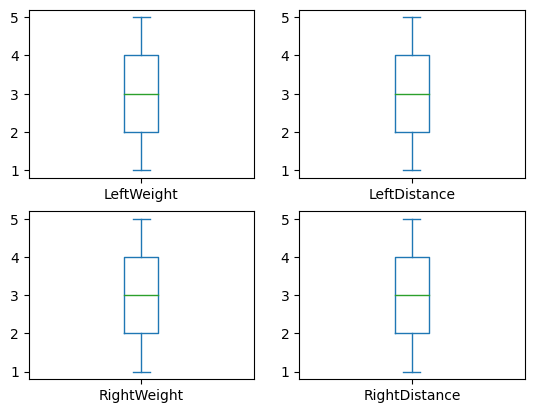

In [62]:
#box and wisker plots
data.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

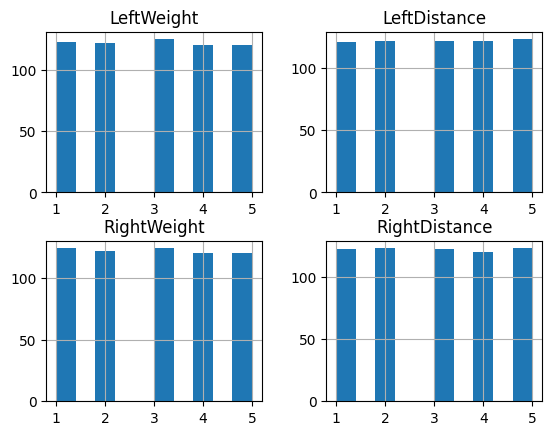

In [63]:
data.hist()
plt.show()

In [74]:
#split-out validation dataset
array = data.values
X = array[:,1:5]
Y = array[:,0]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

CART: 0.786862 (0.051055)


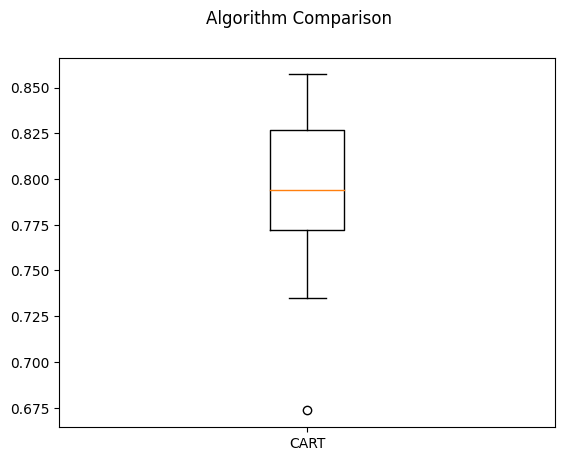

Accuracy score: 0.819672131147541
Confusion matrix: [[ 0  5  3]
 [ 8 51  0]
 [ 2  4 49]]
Classification report               precision    recall  f1-score   support

           B       0.00      0.00      0.00         8
           L       0.85      0.86      0.86        59
           R       0.94      0.89      0.92        55

    accuracy                           0.82       122
   macro avg       0.60      0.59      0.59       122
weighted avg       0.84      0.82      0.83       122

F1 VALUE: 0.591010235870049
---------------------------------------------------------------
NB: 0.899490 (0.033880)


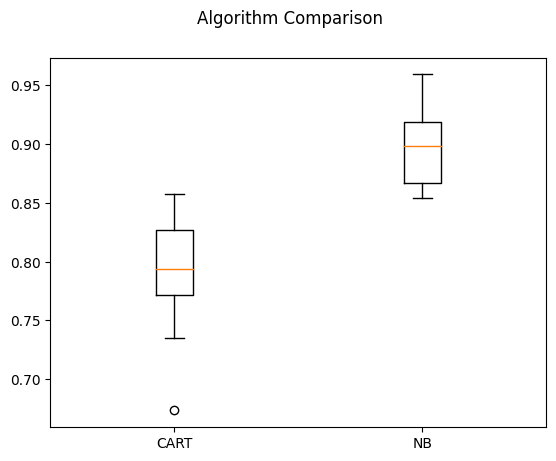

Accuracy score: 0.819672131147541
Confusion matrix: [[ 0  5  3]
 [ 8 51  0]
 [ 2  4 49]]
Classification report               precision    recall  f1-score   support

           B       0.00      0.00      0.00         8
           L       0.85      0.86      0.86        59
           R       0.94      0.89      0.92        55

    accuracy                           0.82       122
   macro avg       0.60      0.59      0.59       122
weighted avg       0.84      0.82      0.83       122

F1 VALUE: 0.591010235870049
---------------------------------------------------------------


In [81]:
from sklearn.metrics import f1_score
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

#spot check algorithms

models = []
#DONTESI FA ALGORITMUS
models.append(('CART', DecisionTreeClassifier() ))

#NAIV BAYES FELE ALGORITMUS
models.append(('NB',GaussianNB() ))


#evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    #print(cv_results)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

#compare algorithms
    fig = plt.figure()
    fig.suptitle('Algorithm Comparison')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names) 
    plt.show()

#make predicitions on validation dataset

    knn = KNeighborsClassifier()
    knn.fit(X_train, Y_train)
    predictions = knn.predict(X_validation)
    print('Accuracy score:', accuracy_score(Y_validation, predictions))
    print('Confusion matrix:',confusion_matrix(Y_validation, predictions))
    print('Classification report',classification_report(Y_validation, predictions))
    print('F1 VALUE:', f1_score(Y_validation, predictions, average='macro'))
    print('---------------------------------------------------------------')

# Feladatok

1.	Elemezzük és tisztítsuk meg a `dbalance.csv` fájl adatait. Az attribútumok leírása, az értékek várt eloszlása a `dbalance.txt` fájlban található.
2.	Hány adatunk van és mi az osztályelosztás?
3.	Építsünk egy döntési fa és egy naiv Bayes-féle osztályozó modellt az adatokra.
4.	Írassuk ki a konfúziós mátrixot, az átlag pontosságot, F1-mértéket a [beépített metrika függvények](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) meghívásával.
